## Data Science Class with Onoja Anthony, PhD (Email: donmaston09@gmail.com)
### Follow our Page on FaceBook: DataEdge Academy
### Subscribe to our YouTube channel: @tonyonoja7880

Note: to run this script, you have to install the relevant Python packages and the datasets.

#### Introduction

In this hand-on session, we'll work through a practical example of multiclass classification using the Iris dataset. We'll:
Train a Logistic Regression and Random Forest models without and with hyperparameter tuning.

We will carryout the following tasks: 
    
1. Perform EDA to understand the dataset

2. Make predictions and evaluate its performance.

3. Use GridSearchCV to optimise hyperparameters.

4. Retrain the models with the best parameters, predict, and evaluate the peformance metrics.



### Problem Dataset
The Iris dataset is a classic dataset in machine learning and statistics, often used for demonstrating multiclass classification problems. It consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width.

#### Multiclass Classification Problem:
The goal is to classify each sample into one of the three Iris species based on the four features. This is a multiclass classification problem because there are more than two classes (three in this case).

#### Key Characteristics:
##### Features:

- Sepal length (cm)

- Sepal width (cm)

- Petal length (cm)

- Petal width (cm)

##### Target Classes:

Iris setosa

Iris versicolor

Iris virginica

Dataset Size: 150 samples (50 samples per class)

#### Challenges:
Class Separation: Some classes are more separable than others. For example, Iris setosa is linearly separable from the other two, but Iris versicolor and Iris virginica have some overlap in feature space.

Feature Importance: Not all features contribute equally to the classification. Petal length and width are often more discriminative than sepal length and width.



#### Step 1: Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

#### Step 2: Exploratory Data Analysis (EDA)

Before modeling, we'll perform EDA to gain insights into the dataset. This step is crucial for understanding feature distributions, class separability, and potential challenges.

In [4]:
df.head() # preview the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# check the variables in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


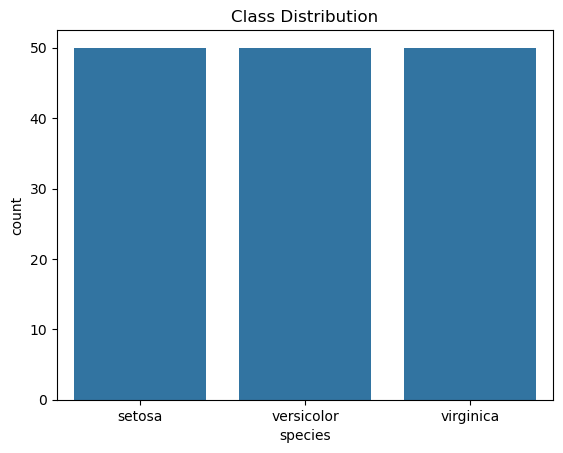

In [6]:
# Visualise the dataset: Check for Distribution
sns.countplot(x='species', data=df)
plt.title('Class Distribution')
plt.show()

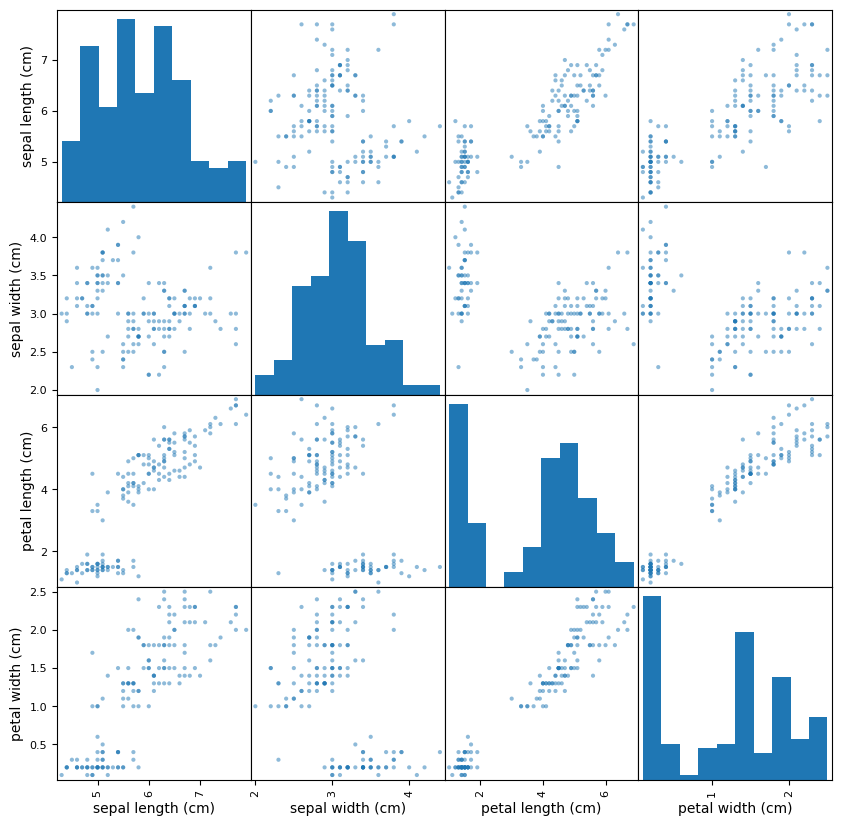

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))
plt.show()

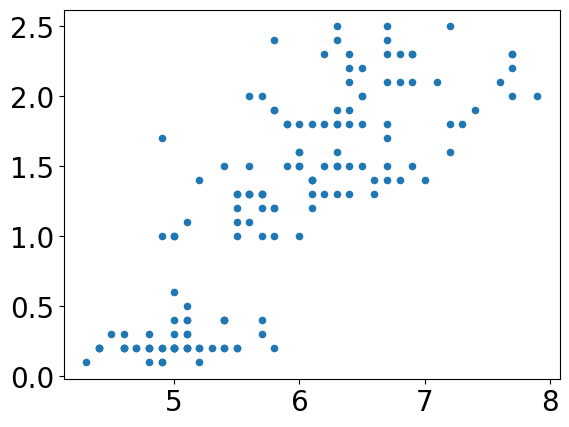

In [8]:
plt.scatter(df['sepal length (cm)'], df['petal width (cm)'], s=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

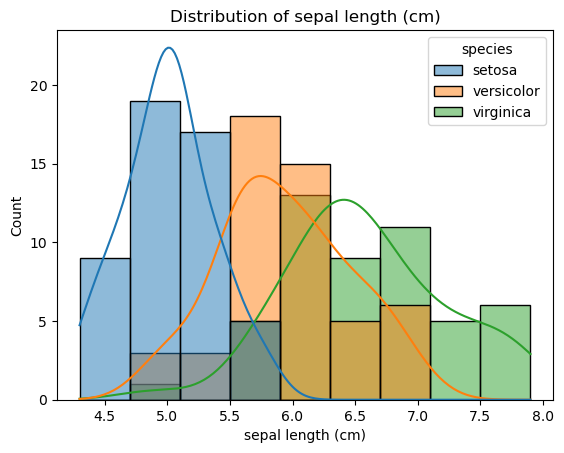

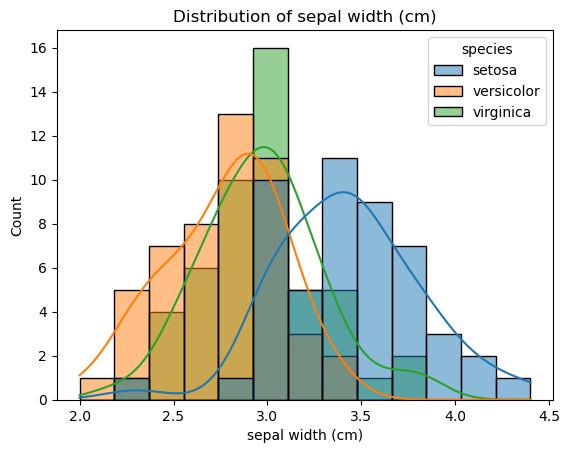

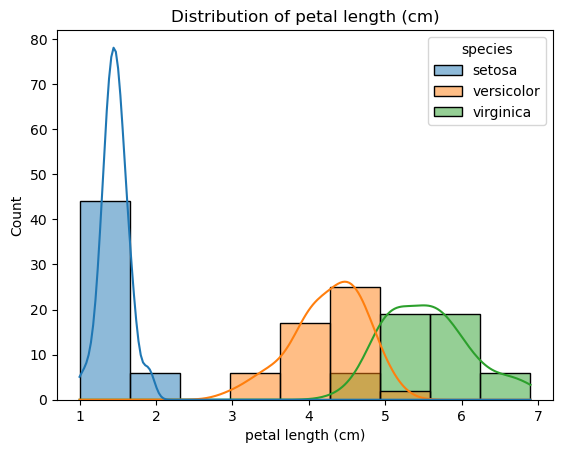

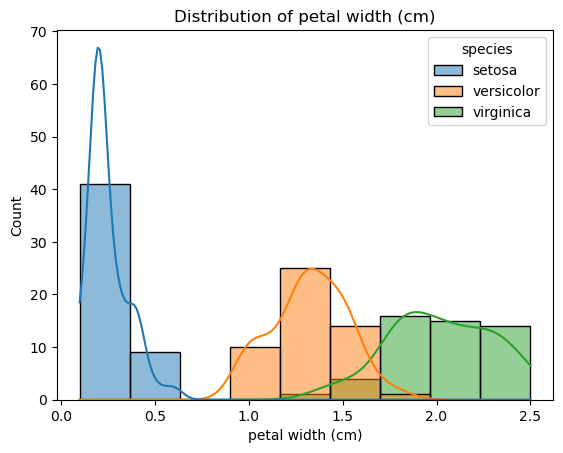

In [9]:
for feature in feature_names:
    sns.histplot(data=df, x=feature, hue='species', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Insight: Petal length and width show distinct distributions across species, while sepal measurements overlap more, suggesting petal features may be more discriminative.


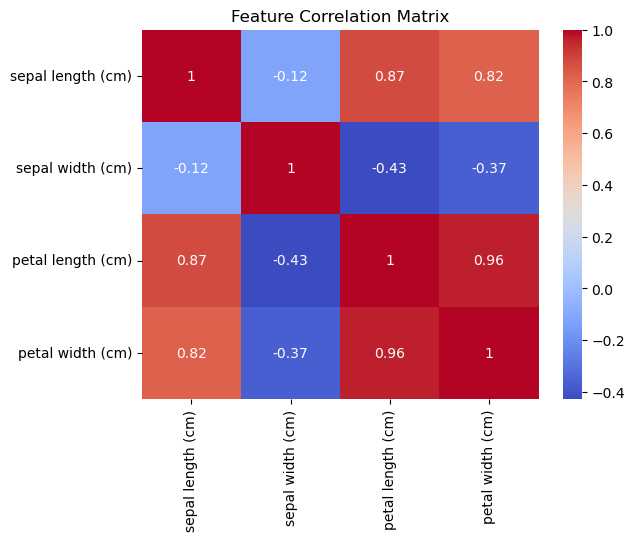

In [10]:
### Correlation Matrix
# Examine relationships between features to detect multicollinearity.

corr = df[feature_names].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Insight: Petal length and petal width are highly correlated (e.g., correlation > 0.9), which may impact models like Logistic Regression that assume feature independence.



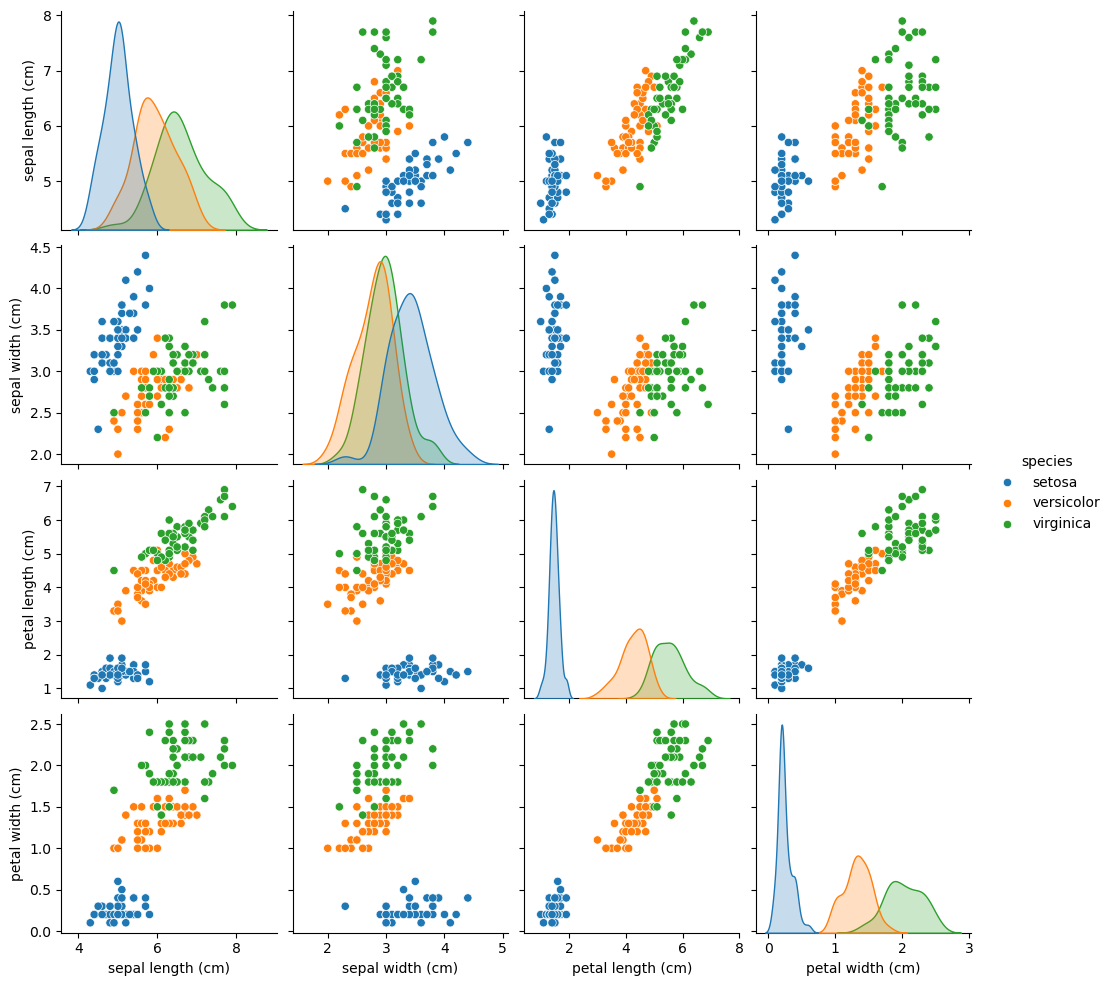

In [11]:
sns.pairplot(df, hue='species') # further check the pair-plot distributions 
plt.show()

Insight: Setosa is well-separated from Versicolor and Virginica, which overlap in some feature pairs (e.g., petal length vs. petal width). This suggests potential classification challenges between the latter two.


In [12]:
df.groupby('species').describe() #check the descriptive statistics 

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

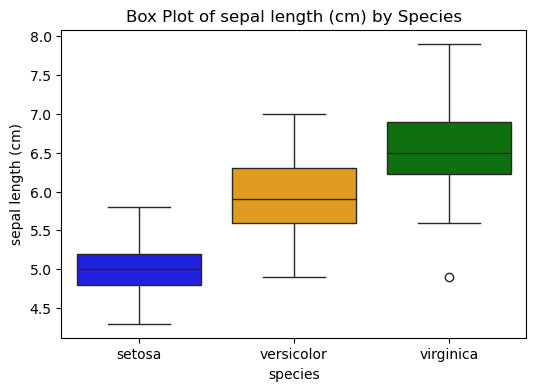

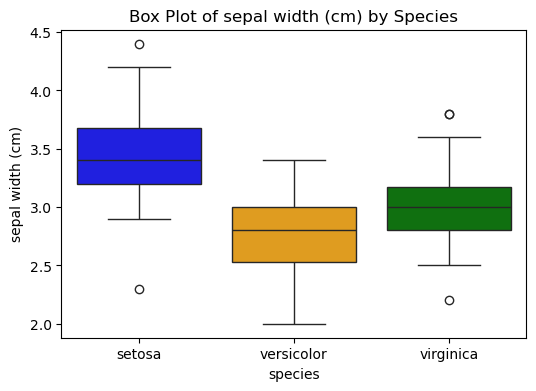

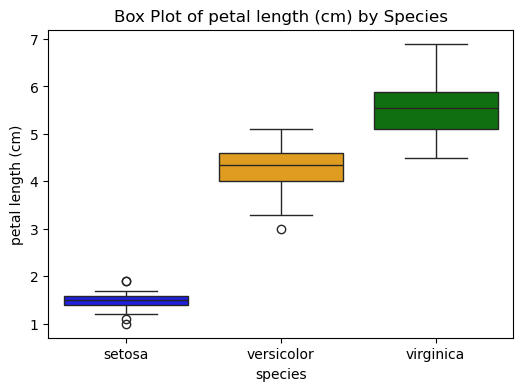

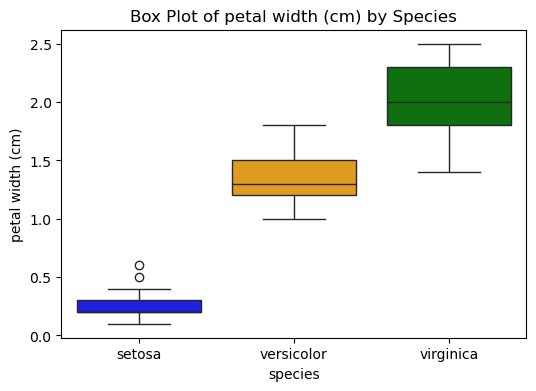

In [13]:
# Define color palette for species
species_palette = {"setosa": "blue", "versicolor": "orange", "virginica": "green"}

# Boxplot for each feature by species
for feature in feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=df, hue='species', palette=species_palette, legend=False)
    plt.title(f'Box Plot of {feature} by Species')
    plt.show()

Insight: Few outliers exist, and petal features show greater variation between species than sepal features.

### Step 3: Modelling Phase


In [14]:
# Data Splitting: 80% Training and 20% Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Scale the dataset to overcome issues with highly correlated features



In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

##### Train the Model without GridSearchCV


In [16]:
# Train initial model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [17]:
# Evaluate
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



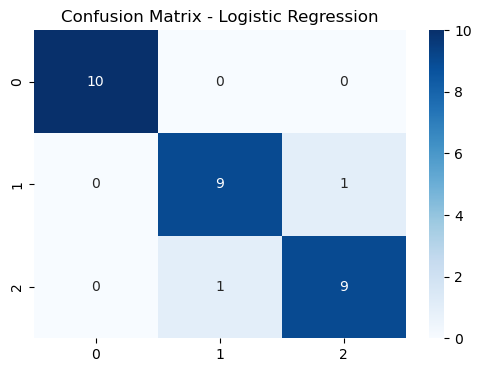

In [19]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

##### Train the Logistic Regression Model with GridSearchCV

In [21]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_logreg.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_logreg.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [22]:
# Retrain with best parameters
logreg_tuned = grid_logreg.best_estimator_
logreg_tuned.fit(X_train_scaled, y_train)
y_pred_logreg_tuned = logreg_tuned.predict(X_test_scaled)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg_tuned))

Tuned Logistic Regression Accuracy: 0.9333333333333333


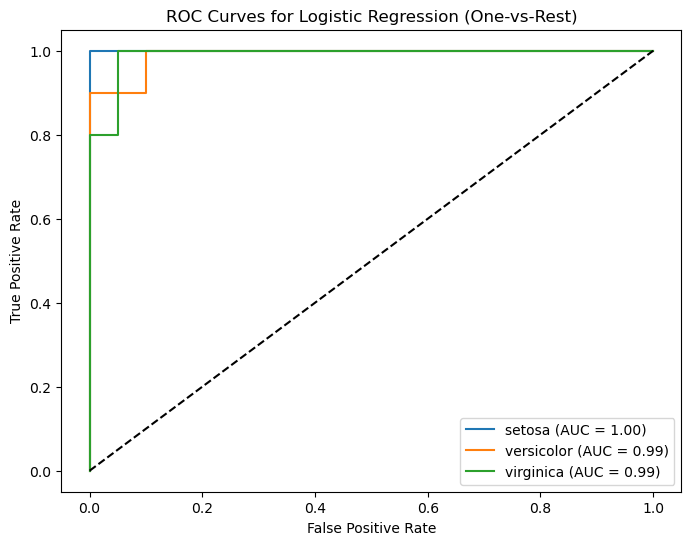

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize test labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get probabilities
y_score_logreg = logreg_tuned.predict_proba(X_test_scaled)

# Compute ROC curves and AUC
fpr_logreg, tpr_logreg, roc_auc_logreg = {}, {}, {}
for i in range(3):
    fpr_logreg[i], tpr_logreg[i], _ = roc_curve(y_test_bin[:, i], y_score_logreg[:, i])
    roc_auc_logreg[i] = auc(fpr_logreg[i], tpr_logreg[i])

# Plot
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr_logreg[i], tpr_logreg[i], label=f'{target_names[i]} (AUC = {roc_auc_logreg[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression (One-vs-Rest)')
plt.legend()
plt.show()

#### Random Forest Model

##### Train the Model without GridSearchCV

In [24]:
# Train initial model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



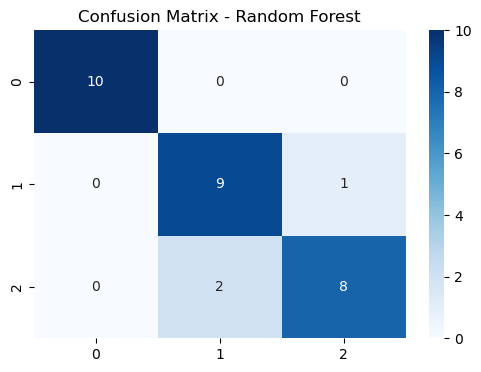

In [26]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

##### Train the Random Forest Model with GridSearchCV

In [29]:
# Hyperparameter tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=11), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [30]:
# Retrain with best parameters
rf_tuned = grid_rf.best_estimator_
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

Tuned Random Forest Accuracy: 0.9333333333333333


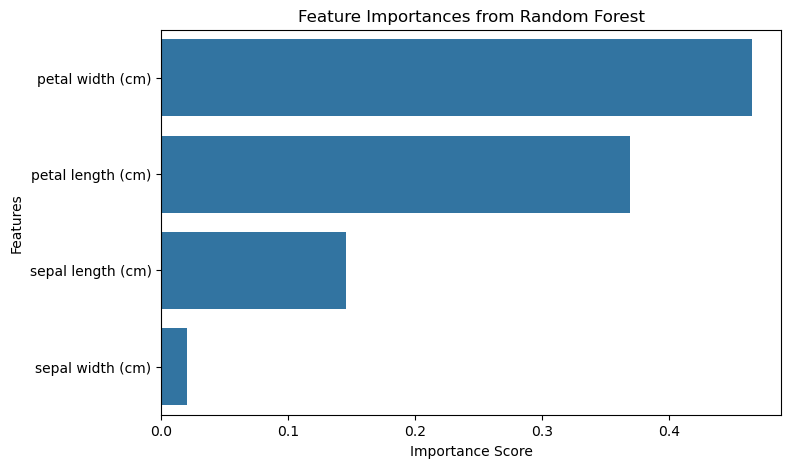

In [32]:
# Get feature importances and sort them in descending order
importances = rf_tuned.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Sort indices from highest to lowest

# Sort feature names and importance values accordingly
sorted_importances = importances[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]

# Plot the sorted feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

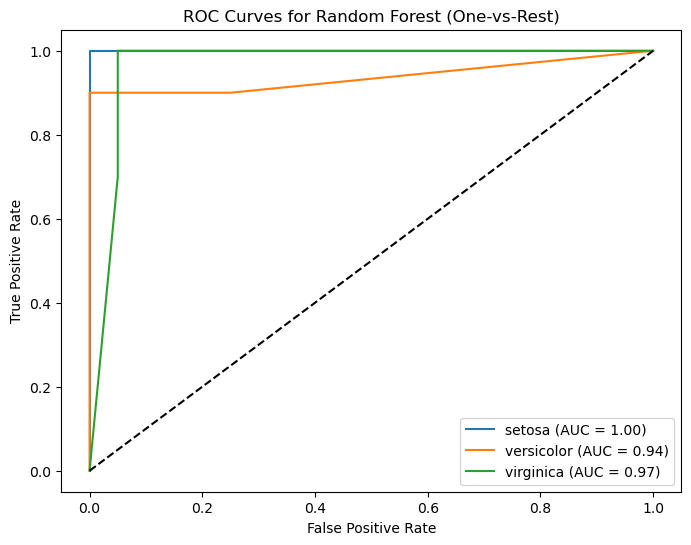

In [33]:
# Get probabilities
y_score_rf = rf_tuned.predict_proba(X_test)

# Compute ROC curves and AUC
fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
for i in range(3):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'{target_names[i]} (AUC = {roc_auc_rf[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest (One-vs-Rest)')
plt.legend()
plt.show()

##### Discussion Questions:
1. Which features were most influential, and why?

2. How do the models handle the Versicolor-Virginica overlap?

3. What do the ROC curves reveal about class discrimination?



### Hand-on Exercise 
Now perform the Multiclass problem using the following dataset:

In [ ]:
# Load dataset (Exercise: Digits dataset)
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

The Digits dataset is another classic dataset in machine learning, often used for demonstrating multiclass classification problems. It consists of 8x8 pixel images of handwritten digits (0 to 9). Each image is represented as a 64-dimensional feature vector (flattened 8x8 grid), and the goal is to classify each image into one of the 10 digit classes.

#### Digits Dataset Multiclass Problem
The task is to classify each 8x8 image into one of the 10 classes (digits 0 to 9) based on the 64 pixel intensity values. This is a multiclass classification problem because there are more than two classes (10 in this case).

#### Key Characteristics:
##### Features:

- 64 features, each representing the pixel intensity of an 8x8 image (flattened into a 1D array).

- Pixel values range from 0 to 16 (grayscale intensity).

##### Classes:

10 classes, corresponding to digits 0 to 9.

##### Dataset Size: 1797 samples (images).

##### Dataset Balance:

The dataset is roughly balanced, with approximately 180 samples per class.

#### Core Challenges:

##### High-Dimensionality:

With 64 features, the dataset is relatively high-dimensional compared to the Iris dataset, which can make some algorithms computationally expensive.

##### Class Overlap:

Some digits (e.g., 1 and 7, 3 and 8, 4 and 9) may have similar pixel patterns, leading to potential misclassifications.

##### Nonlinearity:

The relationship between pixel values and the digit class may not be linear, requiring nonlinear models or feature engineering.

